1. import lib

In [0]:
import numpy as np
from keras.datasets import boston_housing

In [0]:
(train_data, train_labels),(test_data, test_labels) = boston_housing.load_data()
print(train_data.shape)
print(train_labels.shape)

(404, 13)
(404,)


2.EDA


In [0]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /=std

In [0]:
print(mean)

[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]


In [0]:
x_val = train_data[:100]
y_val = train_labels[:100]

x_val_partial = train_data[100:]
y_val_partial = train_labels[100:]

3. Architect 

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(13,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))


4.compile

In [0]:
model.compile(optimizer='rmsprop',
             loss='mse',
             metrics = ['mae'])

5.fit

In [0]:
network = model.fit(x_val_partial,
                   y_val_partial,
                   epochs = 20,
                   batch_size = 20,
                   validation_data =(x_val,y_val))

Train on 304 samples, validate on 100 samples
Epoch 1/20
304/304 [==============================] - 0s 1ms/step - loss: 542.6085 - mean_absolute_error: 21.3575 - val_loss: 448.7734 - val_mean_absolute_error: 18.7925
Epoch 2/20
304/304 [==============================] - 0s 183us/step - loss: 439.9540 - mean_absolute_error: 18.8378 - val_loss: 348.3422 - val_mean_absolute_error: 16.0353
Epoch 3/20
304/304 [==============================] - 0s 181us/step - loss: 329.3355 - mean_absolute_error: 15.7930 - val_loss: 230.3115 - val_mean_absolute_error: 12.5059
Epoch 4/20
304/304 [==============================] - 0s 185us/step - loss: 212.4410 - mean_absolute_error: 12.2426 - val_loss: 126.2852 - val_mean_absolute_error: 8.7747
Epoch 5/20
304/304 [==============================] - 0s 179us/step - loss: 120.4394 - mean_absolute_error: 8.6516 - val_loss: 71.7973 - val_mean_absolute_error: 6.3377
Epoch 6/20
304/304 [==============================] - 0s 182us/step - loss: 74.4181 - mean_absolute_

6. visualize 

In [0]:
import matplotlib.pyplot as plt
history_dict = network.history
history_dict.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

In [0]:
val_loss = history_dict['val_loss']
val_mean_absolute_error = history_dict['val_mean_absolute_error']
loss = history_dict['loss']
mean_absolute_error = history_dict['mean_absolute_error']
epochs = range(1, len(mean_absolute_error)+1)

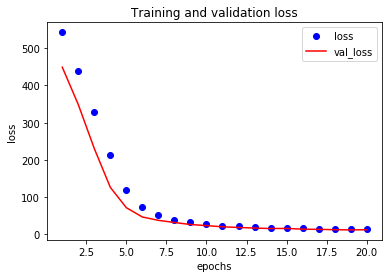

In [0]:
plt.plot(epochs,loss,'bo', label ='loss')
plt.plot(epochs,val_loss,'r', label ='val_loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

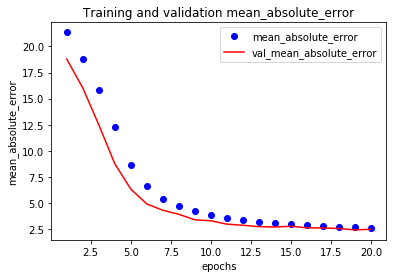

In [0]:
plt.clf()
plt.plot(epochs,mean_absolute_error,'bo', label ='mean_absolute_error')
plt.plot(epochs,val_mean_absolute_error,'r', label ='val_mean_absolute_error')
plt.title('Training and validation mean_absolute_error')
plt.xlabel('epochs')
plt.ylabel('mean_absolute_error')
plt.legend()
plt.show()

In [0]:
results = model.evaluate(test_data,test_labels)
results

102/102 [==============================] - 0s 116us/step


[22.587879854090072, 3.3373357267940746]

In [0]:
solution = model.predict_classes(test_data)
print(solution)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
